# Predicting the Greatest Of All Time tennis player

**Introduction**

The Tennis Player Stats data frame includes a myriad of players’ stats ranging from including a player's age, their country, to if they play left-handed or right-handed. Tennis player stats are significant because they provide insight into a player’s historical record, play style, and success relative to other players. Some key terminology that will be repeatedly referenced in this project includes ELO rank, which represents a player’s probability of winning when matched up to another player. 
In our dataset, the player's elo rank refers to their current elo rank relative to other current players, and their best elo rank refers to the highest elo rank they have achieved in their career. On the other hand, their peak elo is the actual elo score (not rank); the best score they have had in their career.

The variables that will be the focus of this report are a player’s current rank, best rank, the year they turned pro, their number of seasons played, their best and peak elo ranking, the number of titles they have, and their GOAT rank (which is a weighted average of factors which make a player the Greatest Of All Time). The reason we think these variables may predict GOAT rank is that GOAT ranks are often presented alongside a player’s elo statistics. 

According to Ultimate Tennis Statistics, all GOAT-listed players have a variety of statistics that determine their GOAT score, including their rank, the number of points they have, their win percentage, and their current elo. Based on the fact that the GOAT score is multi-faceted, the question we want to answer in this project is can we predict GOAT ranking with (1) a player's current rank, (2) their best rank, (3) what year they turned pro (e.g. 1998), (4) the number of seasons they've played (e.g. 4), (5) their elo rank, (6) their best elo rank, (7) their peak elo, and (8) the number of titles they have (e.g. 1). This study investigates this question using a KNN regression analysis. 

Similar to elo ranks, a player's current rank is the rank they are right now relative to other current players, and best rank is the highest rank they have achieved in their career.


In [71]:
library(tidyverse)
library(repr)
library(tidymodels)
library(gridExtra)
library(GGally)

player_stats <- read_csv("https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS")

colnames(player_stats) <- c(X1 = "index",
                       Age = "age",
                       Country = "country",
                       Plays = "plays",
                       Wikipedia = "wiki",
                       "Current Rank" = "current_rank",
                       "Best Rank" = "best_rank",
                       Name = "name",
                       Backhand = "backhand",
                       "Prize Money" = "prize_money", 
                       Height = "height",
                       "Favorite Surface" = "fav_surface",
                       "Turned Pro" = "turned_pro",
                       Seasons = "seasons",
                       Active = "active",
                       "Current Elo Rank" = "elo_rank",
                       "Best Elo Rank" = "best_elo_rank",
                       "Peak Elo Rank" = "peak_elo",
                       "Last Appearance" = "last_app",
                       Titles = "titles",
                       "GOAT Rank" = "goat_rank",
                       "Best Season" = "best_season",
                       Retired = "retired",
                       Masters = "masters",
                       Birthplace = "birthplace",
                       Residence = "res",
                       Weight = "weight",
                       Coach = "coach",
                       Facebook = "facebook",
                       Twitter = "twitter",
                       Nicknames = "nicknames",
                       "Grand Slams" = "grand_slams",
                       "Davis Cups" = "davis_cups",
                       "Web Site" = "website",
                         "Team Cups" = "team_cups",
                       Olympics = "olympics",
                       "Weeks at No. 1" = "weeks_at_top",
                       "Tour Finals" = "tour_finals")

tidy_player_stats <- player_stats %>%
    filter(active == "Yes") %>%
    filter(!is.na(goat_rank)) %>%
    filter(!is.na(titles)) %>%
    select(current_rank, best_rank, turned_pro, seasons, elo_rank, best_elo_rank, peak_elo, goat_rank, titles) %>%
    extract(col = current_rank, "current_rank" , remove = TRUE, convert = TRUE) %>%
    extract(col = best_rank, "best_rank" , remove = TRUE, convert = TRUE) %>%
    extract(col = elo_rank, "elo_rank" , remove = TRUE, convert = TRUE) %>%
    extract(col = best_elo_rank, "best_elo_rank" , remove = TRUE, convert = TRUE) %>%
    extract(col = peak_elo, "peak_elo" , remove = TRUE, convert = TRUE) %>%
    extract(col = goat_rank, "goat_rank" , remove = TRUE, convert = TRUE) %>%
    arrange(goat_rank)

head(tidy_player_stats)


tidy_player_stats <- as_tibble(tidy_player_stats)

set.seed(9999)
tidy_player_stats_split <- initial_split(tidy_player_stats, prop = 0.75, strata = goat_rank)
tidy_player_stats_training <- training(tidy_player_stats_split)
tidy_player_stats_testing <- testing(tidy_player_stats_split)



Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_character(),
  X1 = col_double(),
  `Turned Pro` = col_double(),
  Seasons = col_double(),
  Titles = col_double(),
  `Best Season` = col_double(),
  Retired = col_double(),
  Masters = col_double(),
  `Grand Slams` = col_double(),
  `Davis Cups` = col_double(),
  `Team Cups` = col_double(),
  Olympics = col_double(),
  `Weeks at No. 1` = col_double(),
  `Tour Finals` = col_double()
)

See spec(...) for full column specifications.



current_rank,best_rank,turned_pro,seasons,elo_rank,best_elo_rank,peak_elo,goat_rank,titles
<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
3,1,1998,22,3,1,2550,1,103
2,1,2003,17,2,1,2629,2,77
1,1,2001,19,1,1,2552,3,84
128,1,2005,15,7,2,2500,12,46
121,3,2005,14,4,3,2329,33,22
15,3,2002,18,12,5,2291,36,16


`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: b

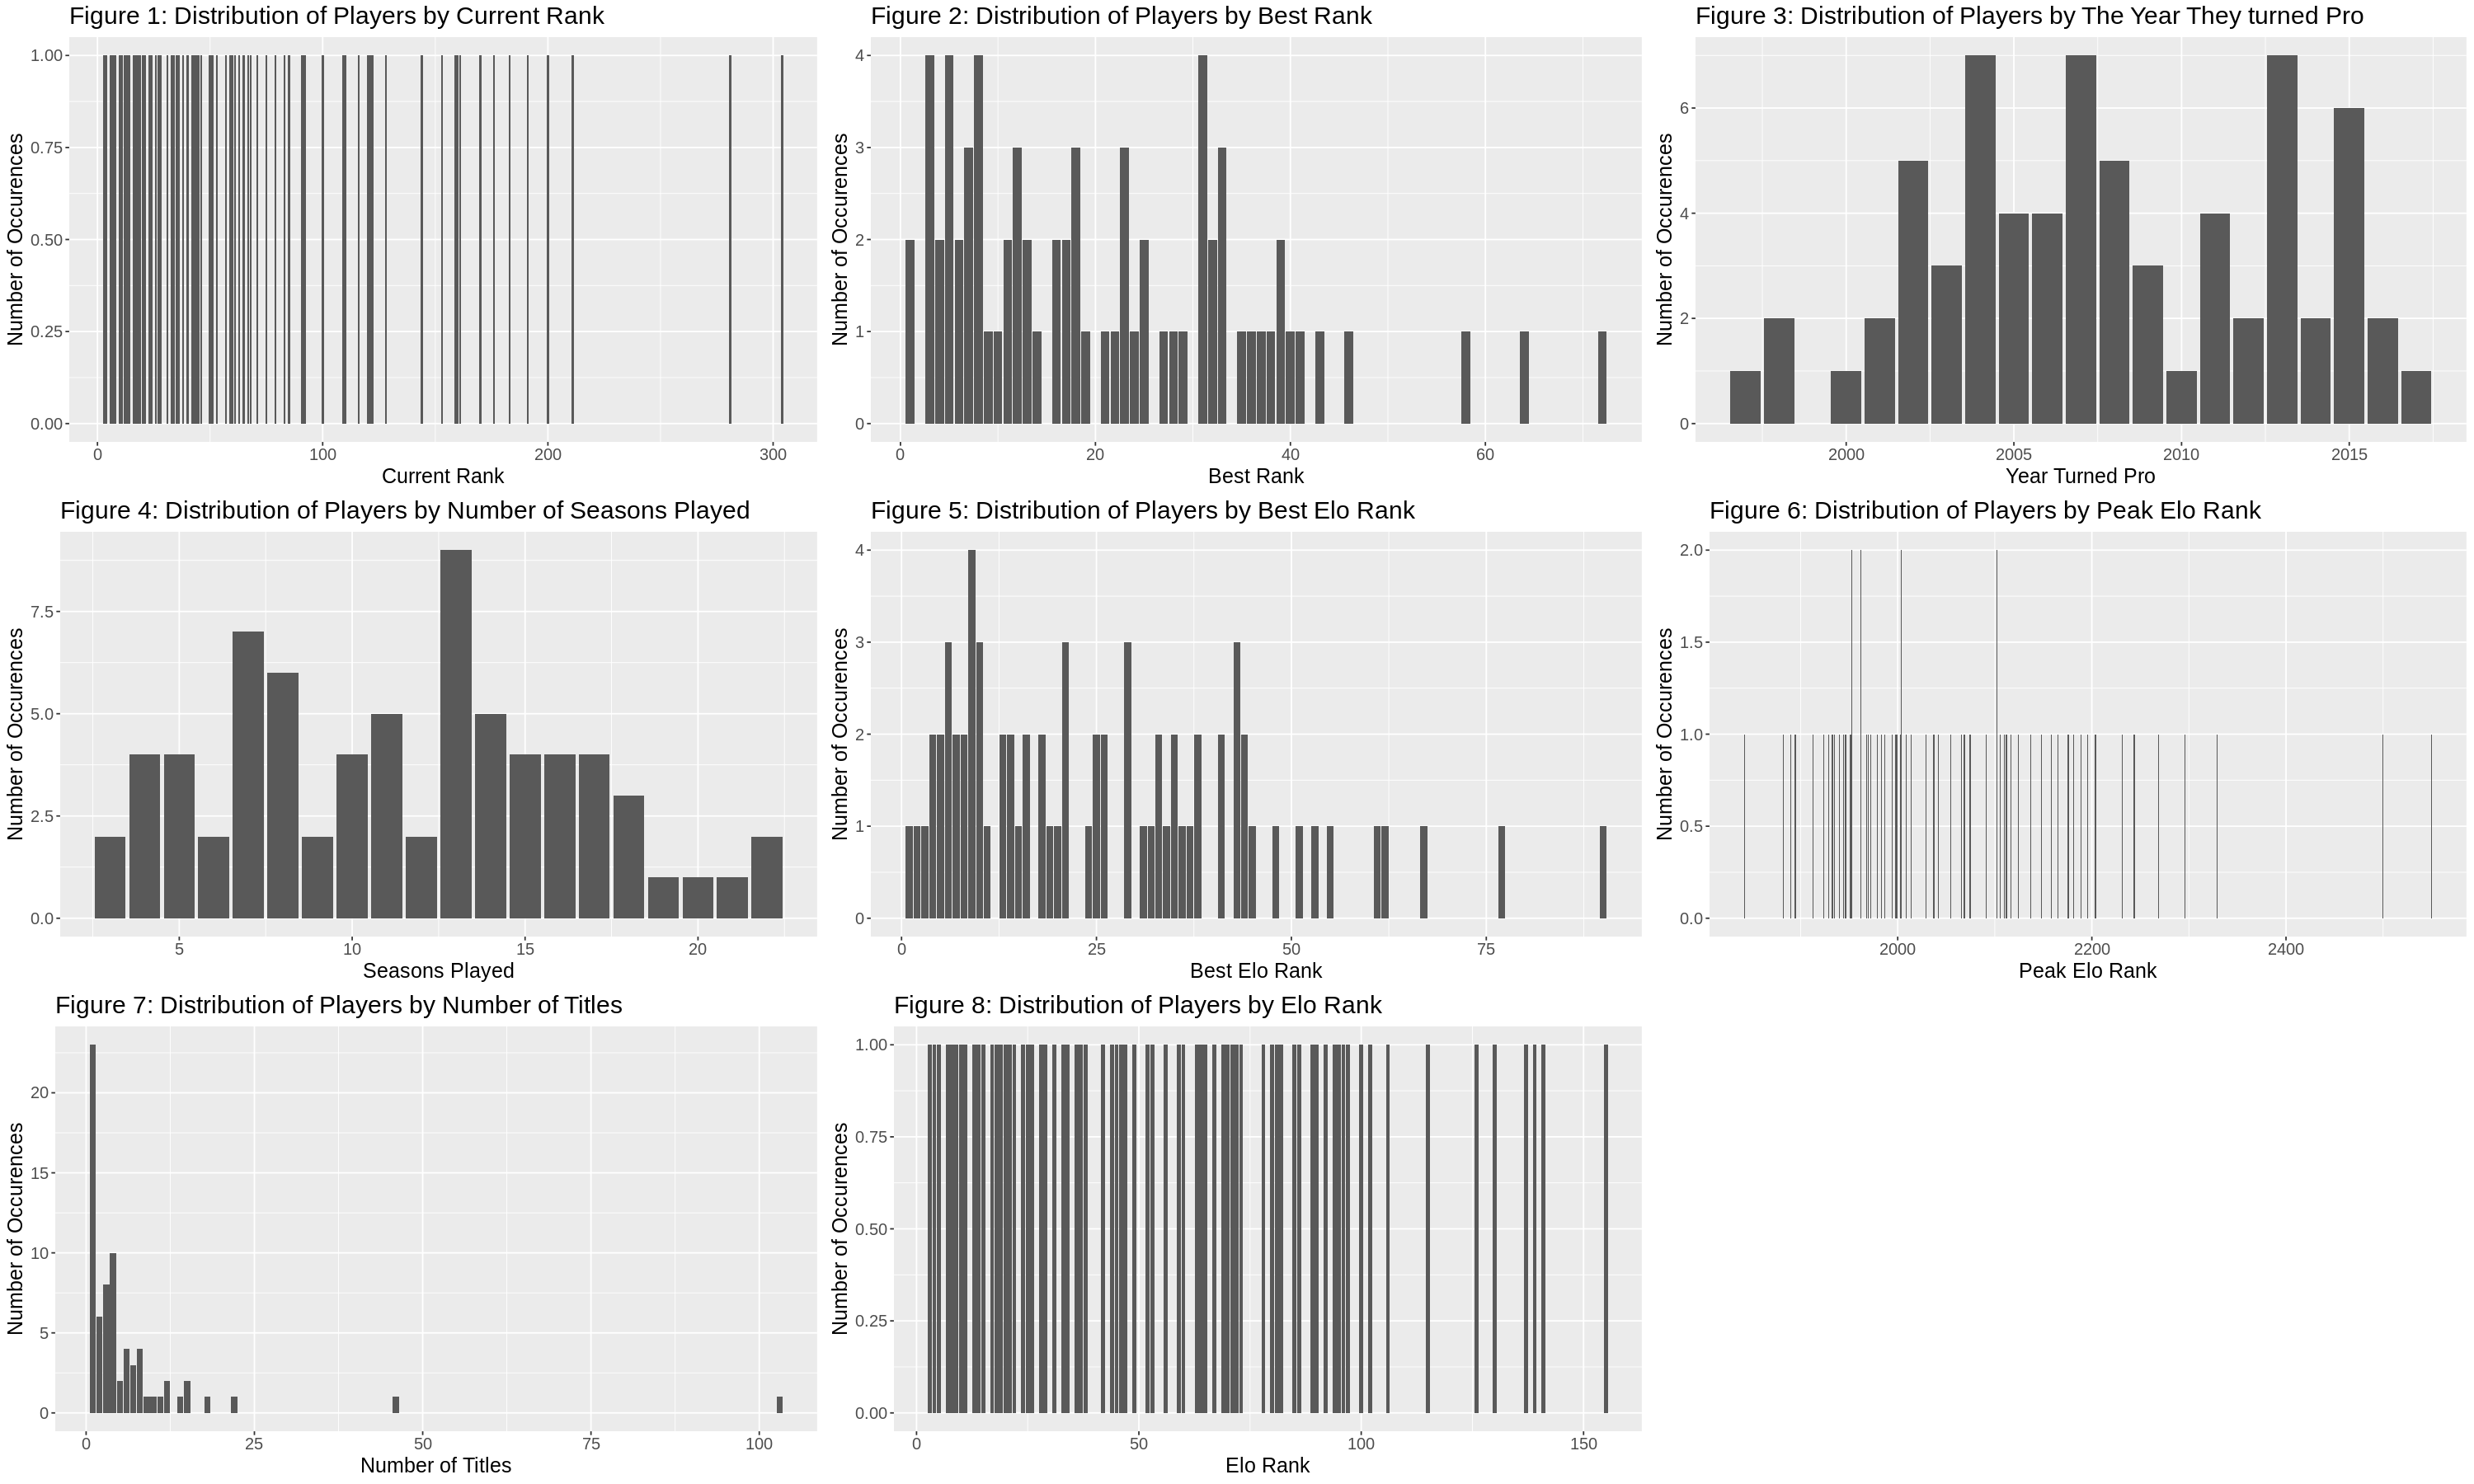

In [72]:
current_rank_distribution <- tidy_player_stats_training %>%
    group_by(current_rank) %>%
    summarize(n=n())
best_rank_distribution <- tidy_player_stats_training %>%
    group_by(best_rank) %>%
    summarize(n=n())
turned_pro_distribution <- tidy_player_stats_training %>%
    group_by(turned_pro) %>%
    summarize(n=n())
seasons_distribution <- tidy_player_stats_training %>%
    group_by(seasons) %>%
    summarize(n=n())
best_elo_rank_distribution <- tidy_player_stats_training %>%
    group_by(best_elo_rank) %>%
    summarize(n=n())
peak_elo_distribution <- tidy_player_stats_training %>%
    group_by(peak_elo) %>%
    summarize(n=n())
titles_distribution <- tidy_player_stats_training %>%
    group_by(titles) %>%
    summarize(n=n())
elo_rank_distribution <- tidy_player_stats_training %>%
    group_by(elo_rank) %>%
    summarize(n=n())

options(repr.plot.width = 8, repr.plot.height = 8)
#predictor variables
current_rank_plot <- current_rank_distribution %>%
    ggplot(aes(x = current_rank, y = n)) +
    geom_histogram(stat = "identity") +
    labs(title = "Figure 1: Distribution of Players by Current Rank", x = "Current Rank", y = "Number of Occurences") + 
    theme(text = element_text(size=15))
#current_rank_plot
best_rank_plot <- best_rank_distribution %>%
    ggplot(aes(x = best_rank, y = n)) +
geom_histogram(stat = "identity") +
    labs(title = "Figure 2: Distribution of Players by Best Rank", x = "Best Rank", y = "Number of Occurences") + 
    theme(text = element_text(size=15))
#best_rank_plot
turned_pro_plot <- turned_pro_distribution %>%
    ggplot(aes(x = turned_pro, y = n)) +
    geom_bar(stat = "identity") +
    labs(title = "Figure 3: Distribution of Players by The Year They turned Pro", x = "Year Turned Pro", y = "Number of Occurences") + 
    theme(text = element_text(size=15))
#turned_pro_plot
seasons_plot <- seasons_distribution %>%
    ggplot(aes(x = seasons, y = n)) +
    geom_histogram(stat = "identity") +
    labs(title = "Figure 4: Distribution of Players by Number of Seasons Played", x = "Seasons Played", y = "Number of Occurences") + 
    theme(text = element_text(size=15))
#seasons_plot
best_elo_rank_plot <- best_elo_rank_distribution %>%
    ggplot(aes(x = best_elo_rank, y = n)) +
    geom_histogram(stat = "identity") +
    labs(title = "Figure 5: Distribution of Players by Best Elo Rank", x = "Best Elo Rank", y = "Number of Occurences") + 
    theme(text = element_text(size=15))
#best_elo_rank_plot
peak_elo_plot <- peak_elo_distribution %>%
    ggplot(aes(x = peak_elo, y = n)) +
    geom_histogram(stat = "identity") +
    labs(title = "Figure 6: Distribution of Players by Peak Elo Rank", x = "Peak Elo Rank", y = "Number of Occurences") + 
    theme(text = element_text(size=15))
#peak_elo_plot
titles_plot <- titles_distribution %>%
    ggplot(aes(x = titles, y = n)) +
    geom_histogram(stat = "identity") +
    labs(title = "Figure 7: Distribution of Players by Number of Titles", x = "Number of Titles", y = "Number of Occurences") + 
    theme(text = element_text(size=15))
#titles_plot
elo_plot<- elo_rank_distribution %>%
    ggplot(aes(x = elo_rank, y = n)) +
    geom_histogram(stat = "identity") +
    labs(title = "Figure 8: Distribution of Players by Elo Rank", x = "Elo Rank", y = "Number of Occurences") + 
    theme(text = element_text(size=15))
#elo_plot

options(repr.plot.width = 25, repr.plot.height = 15)
grid.arrange(current_rank_plot, best_rank_plot, turned_pro_plot, seasons_plot, best_elo_rank_plot, peak_elo_plot, titles_plot, elo_plot)

In [73]:
head(tidy_player_stats_training)
tail(tidy_player_stats_training)

sum2<- tidy_player_stats_training %>%
    summarize(mean_best_rank= mean(best_rank),
              mean_titles=mean(titles),
              mean_best_elo_rank=mean(best_elo_rank),
              mean_peak_elo=mean(peak_elo),
              mean_goat_rank=mean(goat_rank))
sum2

current_rank,best_rank,turned_pro,seasons,elo_rank,best_elo_rank,peak_elo,goat_rank,titles
<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
3,1,1998,22,3,1,2550,1,103
128,1,2005,15,7,2,2500,12,46
121,3,2005,14,4,3,2329,33,22
18,4,2007,13,10,4,2296,49,12
33,5,2004,16,20,6,2244,49,18
7,3,2013,8,13,5,2231,65,11


current_rank,best_rank,turned_pro,seasons,elo_rank,best_elo_rank,peak_elo,goat_rank,titles
<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
91,36,NA,13,137,43,1933,489,1
38,31,2015,5,59,51,1932,489,1
116,33,2003,13,141,62,1895,489,1
109,35,2009,7,94,38,1953,489,1
120,39,2006,9,89,45,1935,489,1
71,58,NA,7,44,43,1952,489,1


mean_best_rank,mean_titles,mean_best_elo_rank,mean_peak_elo,mean_goat_rank
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
20.94444,6.569444,26.26389,2060.75,277.4028


Generally, as a player's goat rank improves (gets closer to 1), best rank also improves (gets closer to 1), titles increase, best elo rank improves (gets closer to 1), and peak elo rank increases.
We can see in the table above, containing the average for the five variables, that as a player passes the mean for each variable that the player's goat rank will likely be above average of this dataset as well.

**EDA**


Warning message:
“Removed 3 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


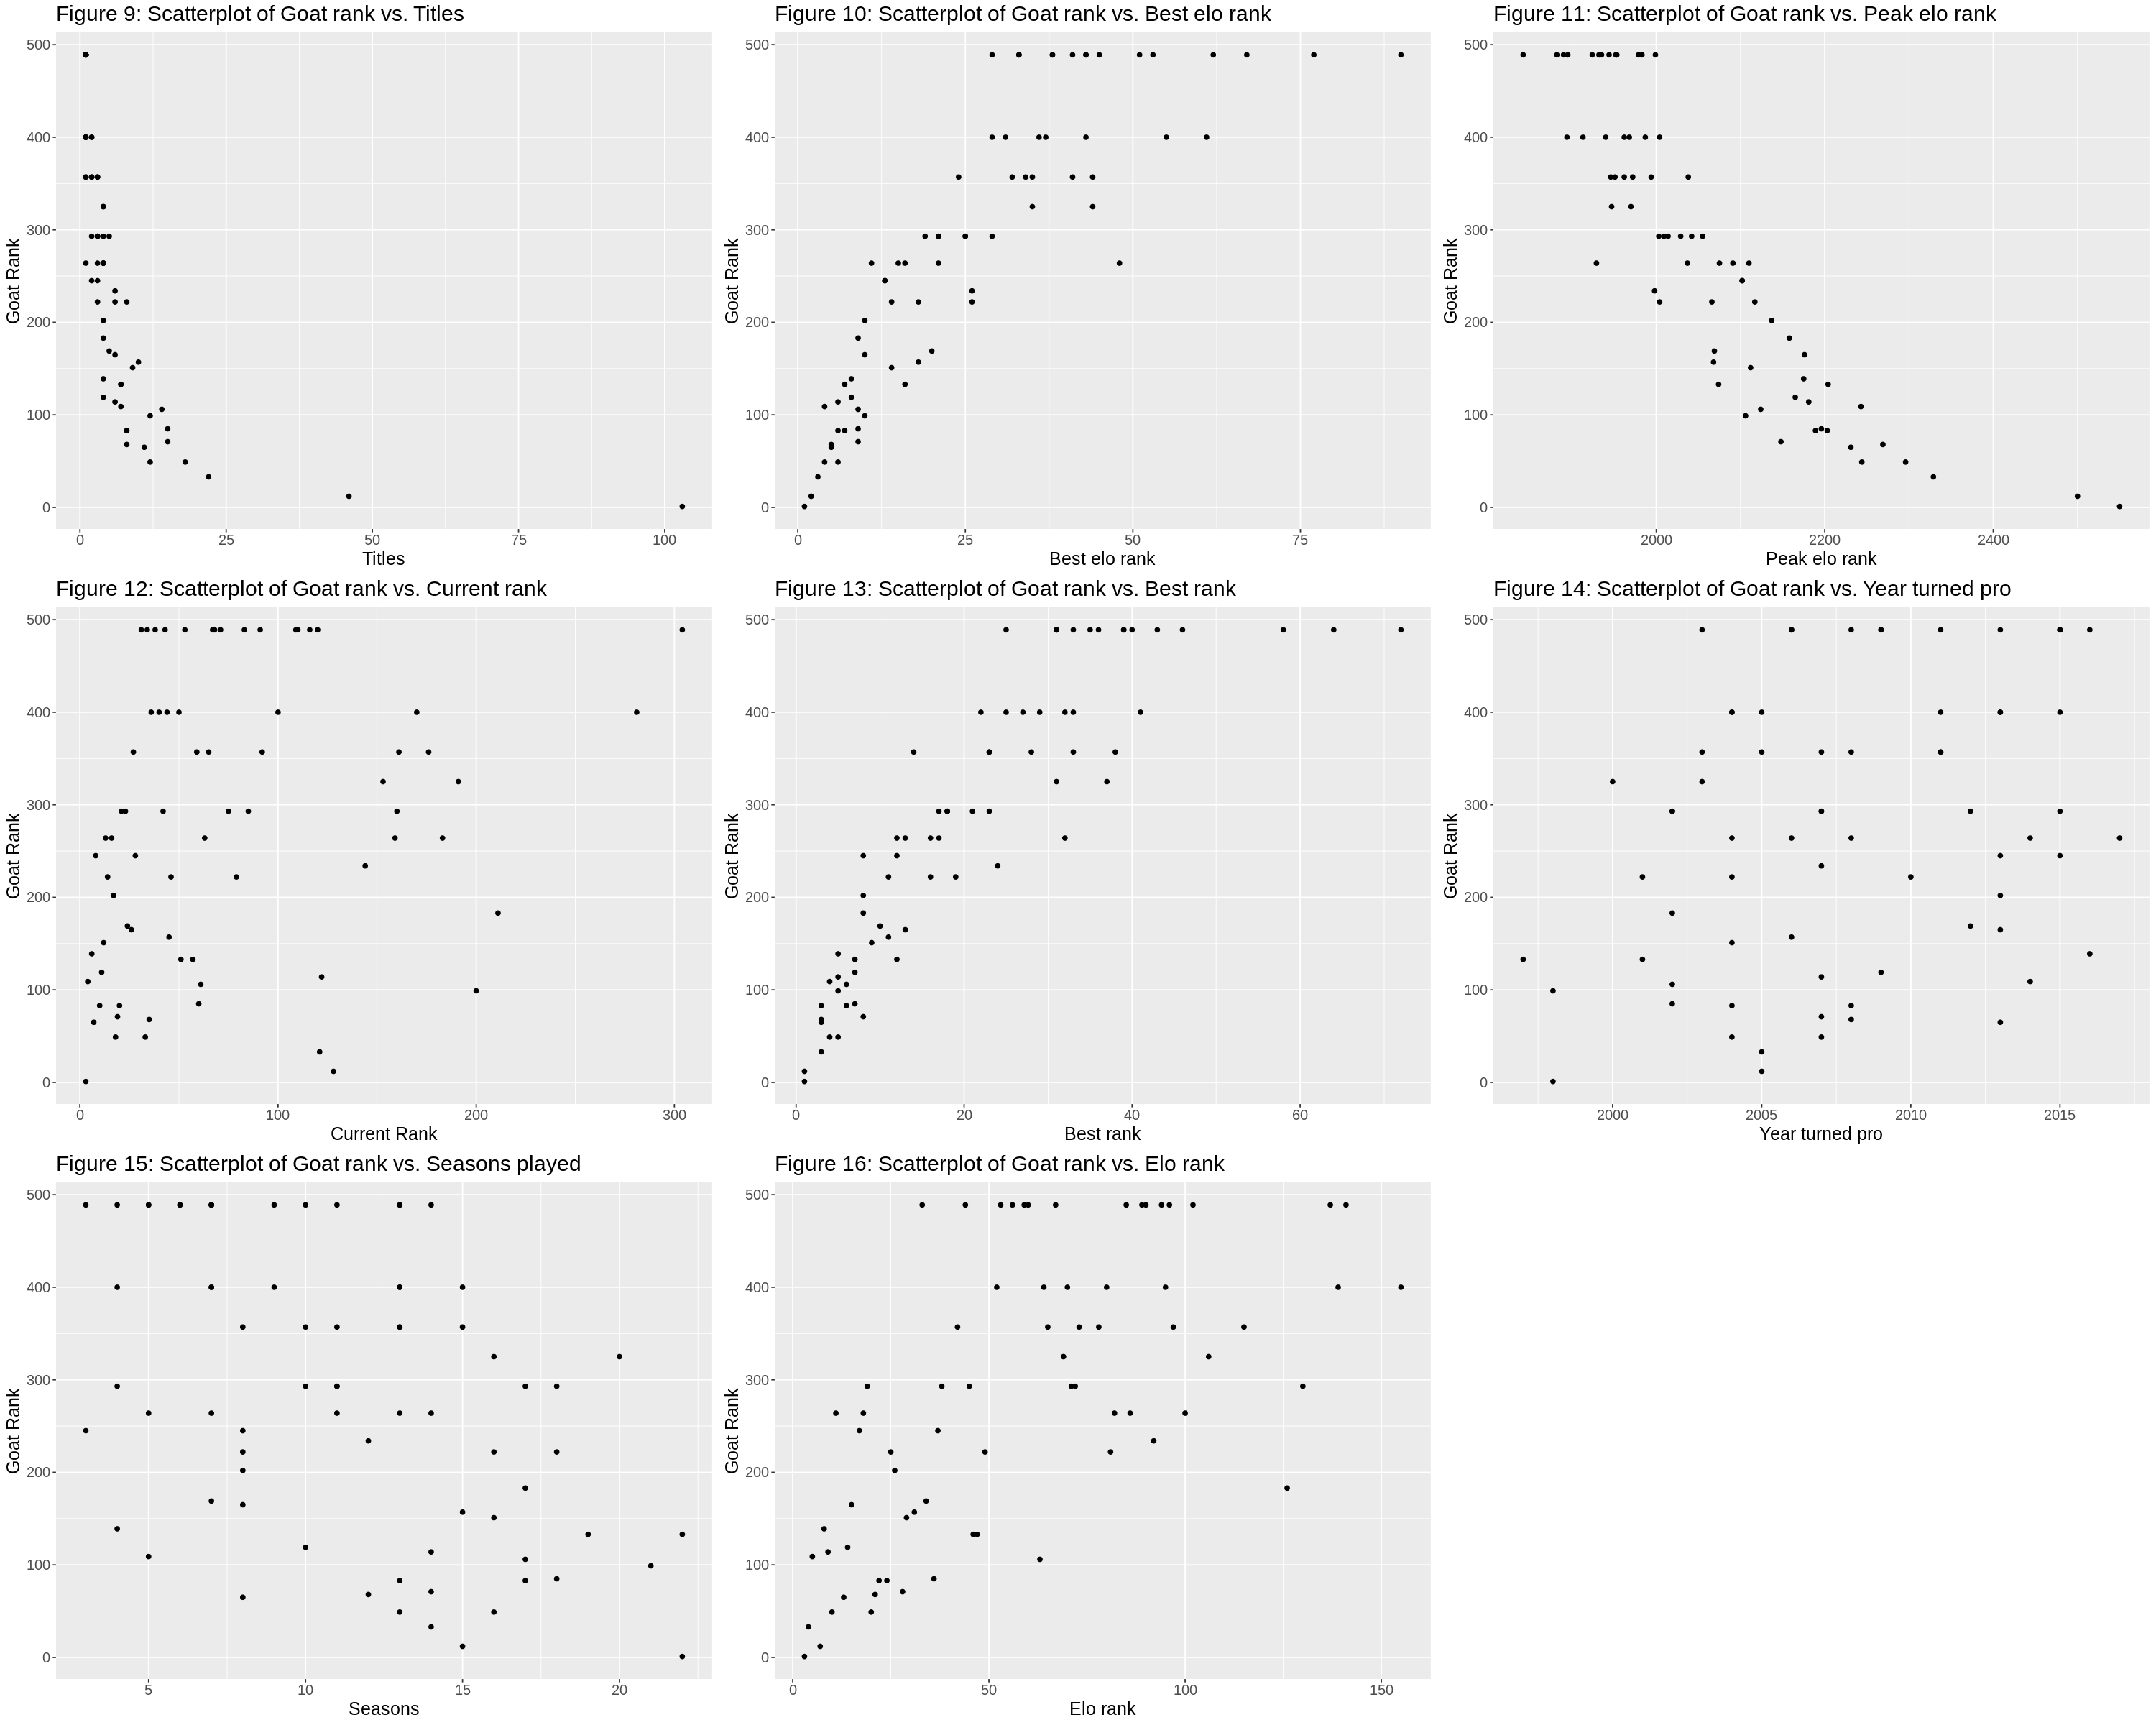

In [74]:
#EDAS                                     
eda1<- tidy_player_stats_training%>%
    ggplot(aes(x=titles, y=goat_rank)) + geom_point()+
    labs(x="Titles", y= "Goat Rank", title="Figure 9: Scatterplot of Goat rank vs. Titles") + 
    theme(text = element_text(size=15))

eda2<- tidy_player_stats_training%>%
    ggplot(aes(x=best_elo_rank, y=goat_rank)) + geom_point() +
    labs(x="Best elo rank", y= "Goat Rank", title="Figure 10: Scatterplot of Goat rank vs. Best elo rank") + 
    theme(text = element_text(size=15))

eda3<- tidy_player_stats_training %>%
    ggplot(aes(x=peak_elo, y=goat_rank)) + geom_point() +
    labs(x="Peak elo rank", y= "Goat Rank", title="Figure 11: Scatterplot of Goat rank vs. Peak elo rank") + 
    theme(text = element_text(size=15))

eda4<- tidy_player_stats_training %>%
    ggplot(aes(x=current_rank, y=goat_rank)) + geom_point() +
    labs(x="Current Rank", y= "Goat Rank", title="Figure 12: Scatterplot of Goat rank vs. Current rank") + 
    theme(text = element_text(size=15))

eda5<- tidy_player_stats_training %>%
    ggplot(aes(x=best_rank, y=goat_rank)) + geom_point()  +
    labs(x="Best rank", y= "Goat Rank", title="Figure 13: Scatterplot of Goat rank vs. Best rank") + 
    theme(text = element_text(size=15))

eda6<-tidy_player_stats_training %>%
    ggplot(aes(x=turned_pro, y=goat_rank)) + geom_point()  +
    labs(x="Year turned pro", y= "Goat Rank", title="Figure 14: Scatterplot of Goat rank vs. Year turned pro") + 
    theme(text = element_text(size=15))

eda7<-  tidy_player_stats_training %>%
    ggplot(aes(x=seasons, y=goat_rank)) + geom_point()  +
    labs(x="Seasons", y= "Goat Rank", title="Figure 15: Scatterplot of Goat rank vs. Seasons played") + 
    theme(text = element_text(size=15))


eda8<- tidy_player_stats_training %>%
    ggplot(aes(x=elo_rank, y=goat_rank)) + geom_point() +
    labs(x="Elo rank", y= "Goat Rank", title="Figure 16: Scatterplot of Goat rank vs. Elo rank") + 
    theme(text = element_text(size=15))

options(repr.plot.width = 25, repr.plot.height = 20)
grid.arrange(eda1, eda2, eda3, eda4, eda5, eda6, eda7,eda8)


From our EDAs we find that from figure 1 there is a strong, negative, linear correlation between goat rank and titles, with the exception of two outliers who's distance from the clear linear relation is over 20 titles.
From figure 2 there is a weak/moderate, positive, linear correlation between goat rank and best elo rank.
From figure 3 there is a weak/moderate, negative, linear correlation between goat rank and peak elo rank, with the exception of two outliers exceeding peak elo rank of 2400. 
From figure 4 there is no correlation between goat rank and current rank.
From figure 5 there is moderate, positive, linear correlation between goat rank and best rank with a few outliers.
From figure 6 there is no correlation between goat rank and year turned pro.
From figure 7 there is no correlation between goat rank and seasons played.
From figure 8 there is a weak/no correlation between goat rank and elo rank.


Based on our exploratory data analysis, we expect to find that our predictors (1) best_rank, (2) best_elo_rank, (3) peak_elo, and (4) titles will be strong predictor variables for predicting GOAT rank. The impact that this could have on findings is to show how each predictor or variable contributes to a player’s GOAT rank; a player that wants to improve their GOAT rank would presumably try to increase the titles they have and improve their best and peak elo rank and best rank. This could also lead to further questions into the effectiveness of GOAT rankings (which are a weighted average of various variables) in showing and determining player performance comparatively. This analysis could provide insight into the accuracy of each predictor variable in predicting the GOAT rankings; does each predictor variable demonstrate whether or not a player is the Greatest of All Time?

Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 3 rows containing missing values”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removing 1 row that contained a missing value”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 3 rows containing missing values”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removing 1 row that contained a missing value”
Warning message:
“Removed 3 rows containing missing values (geom_point).”
Warning message:
“Removed 3 rows containing missing values (geom_point).”
Warning message:
“Removed 3 rows containing non-finite values (stat_density).”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 3 rows containing missing values”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 4 rows containing

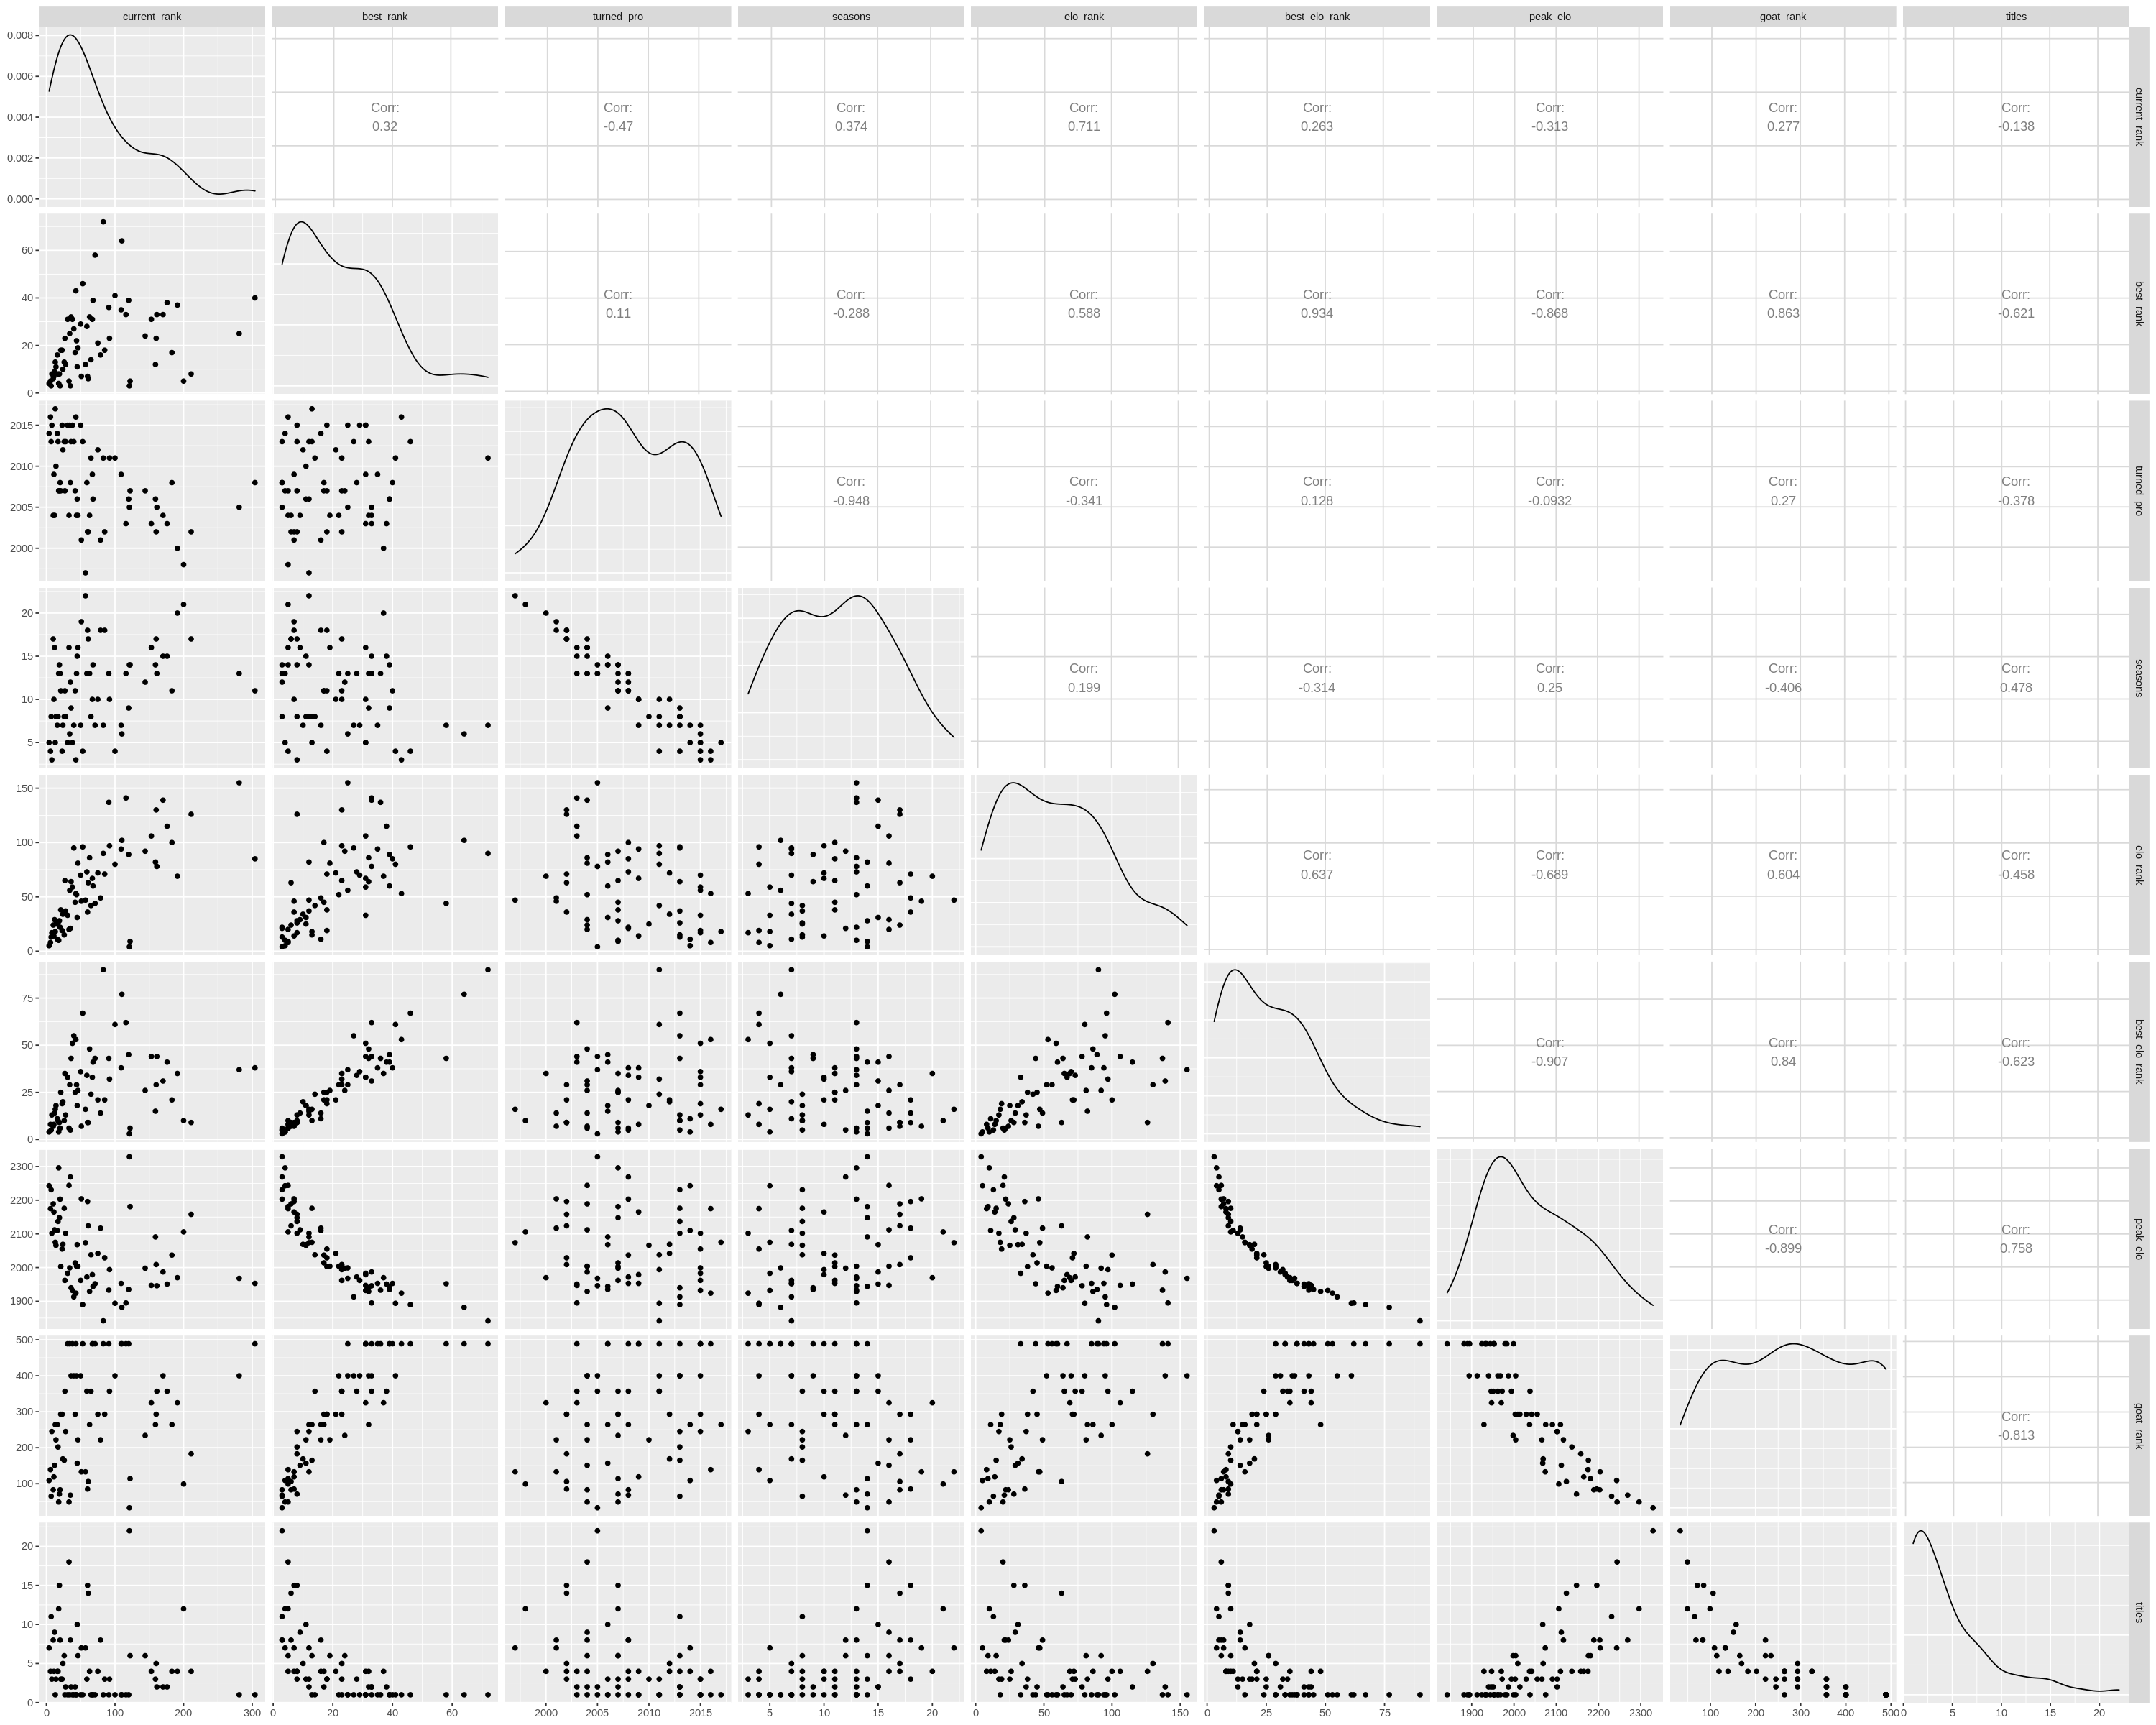

In [75]:
tidy_player_stats_training <- tidy_player_stats_training %>%
    filter(titles < 30)

ggpairs(tidy_player_stats_training)

By looking at the ggpairs we see that there is a strong correlation between Goat rank and Peak elo (-0.899), Best rank (0.863), Best elo rank (0.84), and Titles (-0.813).
On the other hand, Goat rank had a weak correlation with Current rank (0.277), Turned pro (0.27), Seasons (-0.406).
Elo rank had a weak/moderate correlation (0.604) with Goat rank, however, we decided to not use this as one of our predictor variables as we had better options.




Initially, we have intended to do a classification model predicting GOAT rank, but we soon realized that there are “classifying” each GOAT rank based on different factors was not feasible because there were different levels: the number of levels in the prediction column of the data set (as a factor), did not match up with the GOAT ranks column of our the data set (since each number represented a different class). Instead, we decided to pivot to a regression model. After a preliminary exploratory data analysis, we found that the strongest predictor variables for GOAT rank were (1) titles, (2) peak elo, (3) best elo rank, and (4) best rank, for both linear regression models and knn regression models. This is compared to what was initially posited in the proposal: we had assumed that (1) titles and (2) peak elo would be the only strong predictors of GOAT rank.

In [76]:
#cleaning pt.2 
tidy_player_stats_training <- tidy_player_stats_training %>%
    filter(titles < 30)
#we decided to exclude the two outlier variables, because with previous testing they were determined to skew the model.

**KNN Regression using just Titles as a predictor variable**

First, we built our specification model using neighbors=tune(), because we wanted to find the best numbers of neighbors and we chose to use regression because after previous trials with classification and linear regression we found regression to be the most accurate. Classification was not feasible and linear regression was not suitable for our data, predicting widely inaccurate values.
Second, we built a recipe using titles as our predictor for goat rank. We also scaled/centered our predictor as it used differently weighted values than goat rank.
Third, we created a 5 fold cross validation using strata = goat rank.
Fourth, a workflow was created, and then 50 values were tested.
The best k, "tennis_min" was found, and was then put in our workflow to predict our testing dataset.
Finally, summary statistics were generated to evaluate the accuracy of our model. 

In [77]:
set.seed(1234)
tennis_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>% 
    set_engine("kknn") %>%
    set_mode("regression") 

tennis_recipe <- recipe(goat_rank ~ titles, data = tidy_player_stats_training) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())
tennis_recipe


tennis_vfold <- vfold_cv(tidy_player_stats_training, v=5, strata = goat_rank)

tennis_workflow <- workflow() %>%
    add_recipe(tennis_recipe) %>%
    add_model(tennis_spec)

gridvals <- tibble(neighbors = seq(from = 1, to = 50))

tennis_results <- tennis_workflow %>%
    tune_grid(resamples = tennis_vfold, grid = gridvals) %>%
    collect_metrics()

#Find "k" with minimum RMSPE
tennis_min <- tennis_results %>%
   filter(.metric == "rmse") %>%
   arrange(mean) %>% 
   slice(1)
tennis_min

k_min <- tennis_min %>%
         pull(neighbors)

#Use optimal "k" for new model
tennis_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) %>%
         set_engine("kknn") %>%
         set_mode("regression")

tennis_best_fit <- workflow() %>%
    add_recipe(tennis_recipe) %>%
    add_model(tennis_best_spec) %>%
    fit(data=tidy_player_stats_training)

#Produce Summary Statistics
tennis_summary <- tennis_best_fit %>%
    predict(tidy_player_stats_testing) %>%
    bind_cols(tidy_player_stats_testing) %>%
    metrics(truth = goat_rank, estimate = .pred)
tennis_summary

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          1

Operations:

Scaling for all_predictors()
Centering for all_predictors()

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
14,rmse,standard,60.09204,5,5.678077,Model14


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,55.3100260
rsq,standard,0.9121174
mae,standard,49.2891156


Through this model we found the optimal k value to be 14, minimizing our rmspe value.

This graph was made to look at the accuracy of our predictor model. 

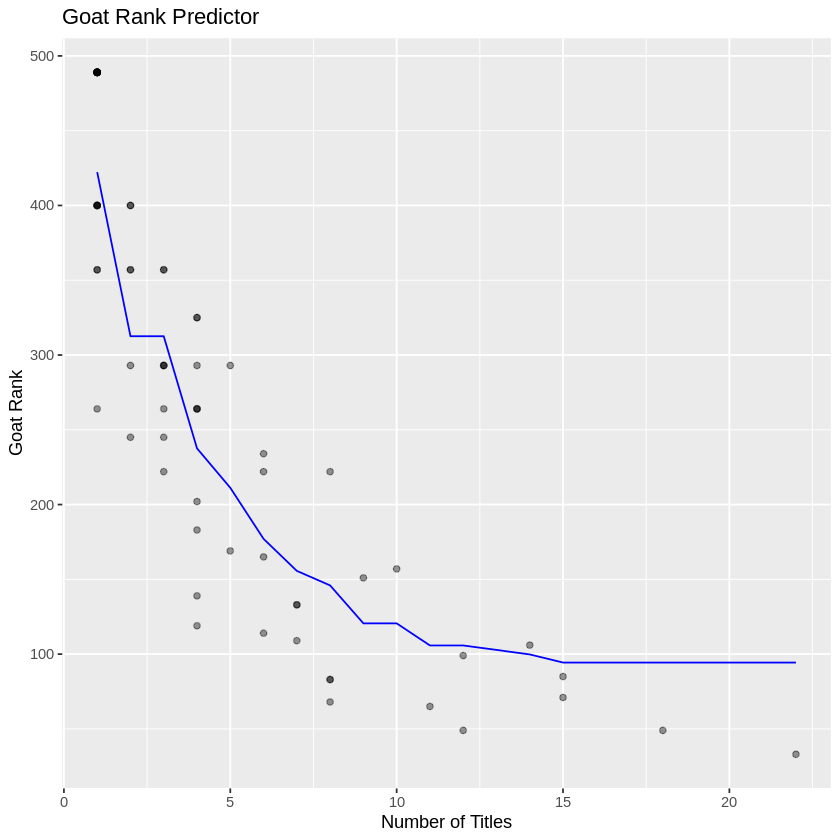

In [78]:
#PLOT FOR PREDICTING GOAT RANK WITH TITLES
options(repr.plot.width = 7, repr.plot.height = 7)
tennis_preds <- tennis_best_fit %>%
  predict(tidy_player_stats_training) %>%
  bind_cols(tidy_player_stats_training)

tennis_plot <- ggplot(tidy_player_stats_training, aes(x = titles, y = goat_rank)) +
    geom_point(alpha = 0.4) +
    geom_line(data=tennis_preds, 
              mapping = aes(x=titles, y=.pred),
              color = "blue") +
    labs(title = "Goat Rank Predictor", x="Number of Titles", y="Goat Rank") 
tennis_plot

We find that the RMSPE of a model predicting goat rank with only titles as the predictor variable is 55.31. We know that this model can be improved upon given our previous exploratory data analysis, since there are 3 other variables which have a strong correlation with goat rank. The graph shows us that the model fits fairly well given only titles as a predictor. Now, we will attempt other models with combinations of the other variables that were strongly correlated with goat rank.

First, we decided to exclude the two outlier variables, because with previous testing they were determined to skew the model.
Second, the same steps as above were redone, this time with various combinations of other strongly correlated variables. (best elo rank, peak elo rank, and best rank)

In [79]:
#MULTIVARIATE MODEL

tidy_player_stats_training <- tidy_player_stats_training %>%
    filter(titles < 30)

#KNN Regression
set.seed(1234)
tennis_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>% 
    set_engine("kknn") %>%
    set_mode("regression") 

tennis_recipe <- recipe(goat_rank ~ titles + best_elo_rank + peak_elo + best_rank, data = tidy_player_stats_training) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())
 
tennis_recipe

tennis_vfold <- vfold_cv(tidy_player_stats_training, v=5, strata = goat_rank)

tennis_workflow <- workflow() %>%
    add_recipe(tennis_recipe) %>%
    add_model(tennis_spec)

gridvals <- tibble(neighbors = seq(from = 1, to = 50))

tennis_results <- tennis_workflow %>%
    tune_grid(resamples = tennis_vfold, grid = gridvals) %>%
    collect_metrics()

#minimum RMSPE
tennis_min <- tennis_results %>%
   filter(.metric == "rmse") %>%
   arrange(mean) %>% 
   slice(1)

tennis_min

k_min <- tennis_min %>%
         pull(neighbors)

tennis_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) %>%
         set_engine("kknn") %>%
         set_mode("regression")

tennis_best_fit <- workflow() %>%
    add_recipe(tennis_recipe) %>%
    add_model(tennis_best_spec) %>%
    fit(data=tidy_player_stats_training)

tennis_summary <- tennis_best_fit %>%
    predict(tidy_player_stats_testing) %>%
    bind_cols(tidy_player_stats_testing) %>%
    metrics(truth = goat_rank, estimate = .pred)

tennis_summary


Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          4

Operations:

Scaling for all_predictors()
Centering for all_predictors()

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
4,rmse,standard,39.55535,5,1.261523,Model04


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,38.6101162
rsq,standard,0.9569848
mae,standard,31.9166667


In our multivariate model, the optimal k value, with the minimum rmspe value, was found to be 4.

## Conclusion

We see that the RMSPE here is 38.61, which is the lowest possible RMSPE given our dataset. When we attempt other combinations of variables, we find that the RMSPE is only ever higher than this model has to offer. Although the code is not shown here for the sake of brevity, 
(titles + best_elo_rank) to predict goat_rank yielded an RMSPE of (51.60), 
(titles + best_elo_rank + peak_elo_rank) yielded an RMSPE of (52.00),
(peak_elo_rank) yielded an RMSPE of (70.14),
(best_elo_rank + peak_elo_rank) yielded an RMSPE of (83.22),
(best_elo_rank + best_rank) yielded an RMSPE of (52.27)
(titles + peak_elo_rank) yielded an RMSPE of (45.43), etc.

This optimal model shows that the linear knn model has an average error of +/-38.61 the actual goat rank. Given that our data is fairly small being under 100 data points, this prediction of goat rank is good given the data available.

Through this experiment, we found that the (1) more titles, (2) higher peak elo rank, (3) higher best elo rank, and (4) higher best rank a player had, the higher their GOAT rank would be. Although the players’ (1) current rank and (2) current elo rank were originally thought to be part of the optimal predictor variables, we soon found that since the GOAT rank is a total score of all achievements whereas current rank and elo rank are based on just your current standings, that they did not relate to each other strongly. In addition, variables (1) seasons played, and (2) year turned pro was ruled out as what we initially thought with more experience and time the higher rank, did not relate to all players. Surprisingly there were quite a few new players with very high GOAT ranks. GOAT rank shows the cumulative result of a player’s historical performance.

In conclusion, in order to achieve a better GOAT rank (closer to 1, which is the top GOAT rank), a player should earn more titles, achieve a better elo rank (as a consequence, increasing both peak elo rank and best elo), and achieve a better rank by winning more matches and playing better overall. This minimizes the RMSPE, or the prediction error, implying that these 4 predictor variables in tandem are highly effective in predicting GOAT rank in the regression model.

## References

**Dataset:**
Ultimate Tennis Statistics. Ultimatetennisstatistics.com. (2021). https://www.ultimatetennisstatistics.com/

**Literature 1:**
This book is about the rise of sports betting, it is now possible to wager on a variety of tennis outcomes both before and during a match. This study demonstrates how the ATP's standard statistics can be combined to anticipate the serving statistics that will be produced when two players meet. These numbers are then input into a spreadsheet model to forecast other match outcomes, such as the length of the game and the likelihood of either player winning. As the contest progresses, these calculations might be adjusted. The strategy is demonstrated by focusing on a particularly long men's singles match played at the 2003 Australian Open between Roddick and El Aynaoui.

Barnett, T., & Clarke, S. R. (2005). Combining player statistics to predict outcomes of tennis matches. IMA Journal of Management Mathematics, 16(2), 113-120. https://doi.org/10.1093/imaman/dpi001

**Literature 2:**
Differences in competition statistics between winners and losers in male and female tennis players in Olympic Games.
The purpose of this study is to explore the differences in performance indicators between the winners and losers of high-level male and female tennis players. The researcher summarized a total of 128 tennis singles matches played on the grass court in the 2012 London Olympics on the official website of the Olympic Games. In the end, the most powerful discriminator of male victory or defeat is the number of break points won (%), the number of points won by one serve (%), and the return of one serve points won (%). For women, the number of break points (%) won. This research shows that players of different genders have different performance statistics on the grass. In addition, the winner is more offensive and safer than the loser, and has nothing to do with gender.

Fernández-García, Á. I., Blanca-Torres, J. C., Nikolaidis, P. T., & Torres-Luque, G. (2019). Differences in competition statistics between winners and losers in male and female tennis players in olympic games. German Journal of Exercise and Sport Research, 49(3), 313-318. https://doi.org/10.1007/s12662-019-00608-y

